In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

dh = pd.read_excel('C:/Users/User/Python_data_analysis/ЦИ/ЦИ_эксель.xlsx')
dh.info() # basic info is shown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Url       1990 non-null   object        
 1   Likes     1990 non-null   int64         
 2   Reposts   1990 non-null   int64         
 3   Comments  1990 non-null   int64         
 4   Views     1990 non-null   int64         
 5   ER        1990 non-null   float64       
 6   Text      1990 non-null   object        
 7   Date      1990 non-null   datetime64[ns]
 8   Author    1990 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 140.0+ KB


In [3]:
dh # head and tail are shown

,Url,Likes,Reposts,Comments,Views,ER,Text,Date,Author
0,https://vk.com/wall-144904445_323857,792,87,95,16521,1.632,Егор Яковлев — о мифах и спорах вокруг Мавзоле...,2020-09-23 11:35:06,public144904445
1,https://vk.com/wall-144904445_323884,245,20,15,16470,0.469,История жвачки: 23 сентября 1848 года американ...,2020-09-23 13:00:08,public144904445
2,https://vk.com/wall-144904445_323963,1356,107,139,27441,2.684,23 сентября 1943 года погибла Валерия Гнаровск...,2020-09-23 15:46:00,public144904445
3,https://vk.com/wall-144904445_324047,319,21,54,17070,0.660,"Знаете ли вы, почему у одного и того же пистол...",2020-09-23 18:53:52,public144904445
4,https://vk.com/wall-144904445_324186,455,28,200,18475,1.144,Газета «Правда» — о Сталине: 24 сентября 1934 ...,2020-09-24 14:06:00,public144904445
...,...,...,...,...,...,...,...,...,...
1985,https://vk.com/wall-144904445_469121,1070,57,73,10803,2.010,"<a href=""https://vk.com/club25557243"" target=""...",2021-09-22 15:00:03,public144904445
1986,https://vk.com/wall-144904445_469253,238,105,2,8151,0.578,Подборка аудиолекций по истории Средних веков ...,2021-09-22 18:00:00,public144904445
1987,https://vk.com/wall-144904445_469260,336,23,23,7850,0.640,"Уничтожить 30 миллионов советских граждан, ост...",2021-09-22 18:22:48,public144904445
1988,https://vk.com/wall-144904445_469517,471,51,28,6728,0.921,23 сентября 1943 года погибла Валерия Гнаровск...,2021-09-23 14:00:00,public144904445


In [4]:
dh.shape # amount of rows and cols is shown

(1990, 9)

In [5]:
dh.describe() # the common stats (except median) are shown

,Likes,Reposts,Comments,Views,ER
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,570.451759,113.844221,66.576382,17550.449749,1.257910
std,379.454131,96.413758,95.917322,7527.720114,0.841018
min,26.000000,0.000000,0.000000,3016.000000,0.050000
25%,315.000000,52.000000,13.000000,12458.250000,0.694000
50%,472.500000,90.000000,34.000000,15928.000000,1.054000
75%,711.500000,147.750000,82.750000,20339.500000,1.561000
max,3773.000000,918.000000,1475.000000,67189.000000,10.068000


In [6]:
dh.median(numeric_only=True) # the median is shown. 
# numeric_only=True to hide the warning of inappropriate data types like object

Likes         472.500
Reposts        90.000
Comments       34.000
Views       15928.000
ER              1.054
dtype: float64

In [7]:
dh['Comments'].describe() # the common stats of the column Comments

count    1990.000000
mean       66.576382
std        95.917322
min         0.000000
25%        13.000000
50%        34.000000
75%        82.750000
max      1475.000000
Name: Comments, dtype: float64

# Finding out the outliers. 

## Method 1.  Using the Inter quartile range

In [8]:
q1 = np.percentile(dh['Comments'], 25)
q3 = np.percentile(dh['Comments'], 75)
print(q1, q3)

13.0 82.75


In [9]:
iqr = q3 - q1 # Inter Quartile Range
print(iqr)

69.75


In [10]:
iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

# Minus in number "-91.625" says that we have no outliers for bottom side

-91.625 187.375


In [24]:
dh[dh['Comments'] > iqr_threshold_top] # the outliers 
# As we will find out later, the iqr method gives us the longest list of outliers

,Url,Likes,Reposts,Comments,Views,ER,Text,Date,Author
4,https://vk.com/wall-144904445_324186,455,28,200,18475,1.144,Газета «Правда» — о Сталине: 24 сентября 1934 ...,2020-09-24 14:06:00,public144904445
44,https://vk.com/wall-144904445_326423,296,27,204,14055,0.883,«Жестяная Лиззи»: как Генри Форд «посадил Амер...,2020-10-01 15:11:00,public144904445
56,https://vk.com/wall-144904445_327289,1109,88,227,28414,2.386,Советский разведчик Рихард Зорге\n \n4 октября...,2020-10-04 12:21:00,public144904445
61,https://vk.com/wall-144904445_327686,612,81,281,20727,1.632,Россия рубежа XIX–XX веков в объективе Максима...,2020-10-05 14:49:22,public144904445
75,https://vk.com/wall-144904445_328931,2111,104,650,64503,4.800,Редактор журнала «Дилетант» Максим Кузахметов ...,2020-10-08 15:29:08,public144904445
...,...,...,...,...,...,...,...,...,...
1948,https://vk.com/wall-144904445_466132,1054,410,629,24257,3.506,«Капитал» Карла Маркса\n\n14 сентября 1867 год...,2021-09-14 12:00:00,public144904445
1949,https://vk.com/wall-144904445_466195,1220,392,228,36108,3.082,"Одним из крупнейших изданий, выходивших на окк...",2021-09-14 15:00:00,public144904445
1951,https://vk.com/wall-144904445_466250,1226,315,266,36526,3.027,Уголовная ответственность несовершеннолетних в...,2021-09-14 17:00:00,public144904445
1968,https://vk.com/wall-144904445_467764,1122,221,218,20229,2.615,Правда о раскулачивании и лжец Пивоваров\n\nРа...,2021-09-18 16:41:31,public144904445


## Method 2.  Using the Standard Deviation

In [12]:
mean = dh['Comments'].mean()
std = dh['Comments'].std()
std_thereshold_bottom_3_5 = mean - 3.5 * std
std_thereshold_top_3_5 = mean + 3.5 * std
print(std_thereshold_bottom_3_5, std_thereshold_top_3_5) 
# Finding the IQR with the "Standard Deviation" method.
# It is often considered to determine the values as outliers if they are > 3.5 Standard Deviation

-269.1342453647454 402.28700918384084


In [30]:
mean = dh['Comments'].mean()
std = dh['Comments'].std()
std_thereshold_bottom_2_5 = mean - 2.5 * std
std_thereshold_top_2_5 = mean + 2.5 * std
print(std_thereshold_bottom_2_5, std_thereshold_top_2_5) 
# Finding the IQR wthe the "Standard Deviation" method.
# Pretty big difference! Let's reduce it. 
# We will consider values as outliers if they are > 2.5 Standard Deviation

-173.21692328637593 306.36968710547137


# Comparison of how outliers influence mean and median values

In [27]:
iqr_no_outliers = dh[dh['Comments'] <= iqr_threshold_top]
std_3_5_no_outliers = dh[dh['Comments'] <= std_thereshold_top_3_5]
std_2_5_no_outliers = dh[dh['Comments'] <= std_thereshold_top_2_5]

In [28]:
print(dh['Comments'].mean()) # The common mean (all rows in the column)
print(iqr_no_outliers['Comments'].mean()) # The mean of non-outliers computed by common iqr
print(std_3_5_no_outliers['Comments'].mean()) # The mean of non-outliers computed std 3.5
print(std_2_5_no_outliers['Comments'].mean()) # The mean of non-outliers computed std 2.5

66.57638190954773
44.47673782156541
58.816743236345076
54.76564924987067


In [29]:
print(dh['Comments'].median()) # The common median (all rows in the column)
print(iqr_no_outliers['Comments'].median()) # The median of non-outliers computed by common iqr
print(std_3_5_no_outliers['Comments'].median()) # The median of non-outliers computed std 3.5
print(std_2_5_no_outliers['Comments'].median()) # The median of non-outliers computed std 2.5

# Median is more stable than mean

34.0
30.0
34.0
33.0


# Filtering the outliers with key words

### As we can see below, the Soviet theme is prevalent among all the outliers.

In [33]:
soviet_check = dh[['Comments', 'Text']]['Text'].str.contains('сталин|ссср|ленин|советс', case=False).value_counts()
# Among all values the Soviet theme is RARE.
# The words "сталин" or "ссср" or "ленин" or "советс" is used in 884 posts against 1106 

soviet_check_iqr = dh[dh['Comments'] > iqr_threshold_top]['Text'].str.contains('сталин|ссср|ленин|советс', case=False).value_counts()
# Among all outliers the Soviet theme is PREVALENT
# The words "сталин" or "ссср" or "ленин" or "советс" is used in 97 posts against 66 

soviet_check_std_3_5 = dh[dh['Comments'] > std_thereshold_top_3_5]['Text'].str.contains('сталин|ссср|ленин|советс', case=False).value_counts()
# Among outliers std_3_5 the Soviet theme is RARE.
# The words "сталин" or "ссср" or "ленин" or "советс" is used in 14 posts against 17 

soviet_check_std_2_5 = dh[dh['Comments'] > std_thereshold_top_2_5]['Text'].str.contains('сталин|ссср|ленин|советс', case=False).value_counts()
# Among outliers std_3_5 the Soviet theme is RARE.
# The words "сталин" or "ссср" or "ленин" or "советс" is used in 28 posts against 29 

print(soviet_check, '\n')
print(soviet_check_iqr, '\n')
print(soviet_check_std_3_5, '\n')
print(soviet_check_std_2_5)

False    1106
True      884
Name: Text, dtype: int64 

True     97
False    66
Name: Text, dtype: int64 

False    17
True     14
Name: Text, dtype: int64 

False    29
True     28
Name: Text, dtype: int64


In [32]:
def filter_rows(df, word):
    return df[df['Text'].str.contains(word, case=False)]

filtered_df = filter_rows(dh, 'сталин|ссср|ленин|советс')

filtered_df

,Url,Likes,Reposts,Comments,Views,ER,Text,Date,Author
0,https://vk.com/wall-144904445_323857,792,87,95,16521,1.632,Егор Яковлев — о мифах и спорах вокруг Мавзоле...,2020-09-23 11:35:06,public144904445
2,https://vk.com/wall-144904445_323963,1356,107,139,27441,2.684,23 сентября 1943 года погибла Валерия Гнаровск...,2020-09-23 15:46:00,public144904445
4,https://vk.com/wall-144904445_324186,455,28,200,18475,1.144,Газета «Правда» — о Сталине: 24 сентября 1934 ...,2020-09-24 14:06:00,public144904445
8,https://vk.com/wall-144904445_324559,1603,90,111,38008,3.022,"Человек, который спас мир \n \nВ ночь c 25 на ...",2020-09-25 14:00:12,public144904445
12,https://vk.com/wall-144904445_324726,442,26,13,13744,0.806,Фестиваль «Цифровая история: разгром фальшивой...,2020-09-26 11:07:42,public144904445
...,...,...,...,...,...,...,...,...,...
1978,https://vk.com/wall-144904445_468648,470,158,30,15797,1.102,Продолжаем знакомство с советскими мультфильма...,2021-09-21 12:00:00,public144904445
1979,https://vk.com/wall-144904445_468670,297,43,32,11178,0.623,Приглашаем на автограф-сессию Егора Яковлева! ...,2021-09-21 14:36:29,public144904445
1982,https://vk.com/wall-144904445_468735,1527,168,202,23363,3.178,Матвей Кузьмин: самый пожилой Герой Советского...,2021-09-21 20:00:01,public144904445
1987,https://vk.com/wall-144904445_469260,336,23,23,7850,0.640,"Уничтожить 30 миллионов советских граждан, ост...",2021-09-22 18:22:48,public144904445


# The most commented outliers posts 

In [17]:
the_longest_outliers = dh[dh['Comments'] > iqr_threshold_top]['Text']
the_longest_outliers

4       Газета «Правда» — о Сталине: 24 сентября 1934 ...
44      «Жестяная Лиззи»: как Генри Форд «посадил Амер...
56      Советский разведчик Рихард Зорге\n \n4 октября...
61      Россия рубежа XIX–XX веков в объективе Максима...
75      Редактор журнала «Дилетант» Максим Кузахметов ...
                              ...                        
1948    «Капитал» Карла Маркса\n\n14 сентября 1867 год...
1949    Одним из крупнейших изданий, выходивших на окк...
1951    Уголовная ответственность несовершеннолетних в...
1968    Правда о раскулачивании и лжец Пивоваров\n\nРа...
1982    Матвей Кузьмин: самый пожилой Герой Советского...
Name: Text, Length: 163, dtype: object

In [18]:
mentions_in_the_outliers = {}

for text in the_longest_outliers:
    words = text.split()
    for word in words:
        if '@dighistory' in word:
            word_without_mention = re.sub(r'@\w+', '', word)
            if word_without_mention in mentions_in_the_outliers:
                mentions_in_the_outliers[word_without_mention] += 1
            else:
                mentions_in_the_outliers[word_without_mention] = 1

mentions_in_the_outliers

{'#СССР': 1,
 '#Новоевремя': 18,
 '#Новейшеевремя': 34,
 '#НовоеВремя': 2,
 '#Великаяотечественная': 1,
 '#Книжнаяподборка': 2,
 '#ВеликаяОтечественная': 16,
 '#Подборка': 1,
 '#Новости': 15,
 '#Видеоподборка': 1,
 '#Видеоподборки': 5,
 '#Подборкидокументов': 1,
 '#Новейшаяистория': 12,
 '#Гражданская_война': 1,
 '#Новейшнеевремя': 1,
 '#Гражданскаявойна': 5,
 '#Новейшеевре': 1,
 'Новейшеевремя': 1,
 '#новости': 1,
 '#Видео': 1,
 '#Предложка': 2,
 '#Борьба_с_колонизаторами': 1,
 '#Книжныеподборки': 4,
 '#Холоднаявойна': 2,
 '#Плёнка': 1,
 '#ПерваяМировая': 1,
 '#Плакаты': 1,
 '#ВеликаяОтечественная.': 2}

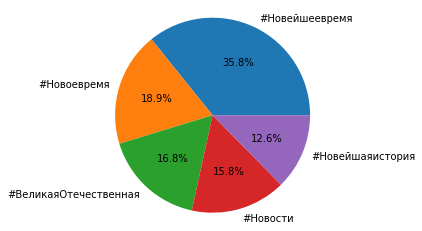

In [19]:

sorted_mentions_in_the_outliers = sorted(mentions_in_the_outliers.items(), key=lambda x: x[1], reverse=True)

# To display 5 largest values
top_5_keys_mentions_in_the_outliers = sorted_mentions_in_the_outliers[:5]

# Dividing keys and values for diagram
labels = [item[0] for item in top_5_keys_mentions_in_the_outliers]
values = [item[1] for item in top_5_keys_mentions_in_the_outliers]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()


In [20]:
mentions_in_all_rows = {}

for text in dh['Text']:
    words = text.split()
    for word in words:
        if '@dighistory' in word:
            word_without_mention = re.sub(r'@\w+', '', word)
            if word_without_mention in mentions_in_all_rows:
                mentions_in_all_rows[word_without_mention] += 1
            else:
                mentions_in_all_rows[word_without_mention] = 1

mentions_in_all_rows

{'#Новоевремя': 178,
 '#ВеликаяОтечественная': 177,
 '#СССР': 11,
 '#Анонсы': 12,
 '#СредниеВека': 6,
 '#Античность': 14,
 '#Новости': 44,
 '#Новейшеевремя': 258,
 '#Книжнаяподборка': 10,
 '#Видеоподборка': 72,
 '#НовоеВремя': 7,
 '#Видео': 9,
 '#Ранееновоевремя': 1,
 '#Борьба_с_колонизаторами': 6,
 '#НовейшееВремя': 1,
 '#Средневековье': 21,
 '#Великаяотечественная': 2,
 '#Подборкилитературы': 16,
 '#Новейшаяистория': 74,
 '#ВеликаяОтечественнаявойна': 7,
 'https://vk.com/-dazhe-esli-perebit-10-millionov-russkih-zhitomirskaya-rech': 1,
 '#Средниевека': 50,
 '#Лекции': 1,
 '#Подборка': 2,
 '#Видеоподборки': 218,
 '#Подборкидокументов': 1,
 '#Новейшееаремя': 1,
 '#Революция': 12,
 '#Гражданская_война': 3,
 '#Новаяистория': 3,
 '#Новейшнеевремя': 2,
 '#Новйшеевремя': 1,
 '#Книжныеподборки': 173,
 '#НовостиНауки': 1,
 '#Азия': 1,
 '#Эксклюзив': 1,
 '#ЭпохаСталин': 1,
 '#Искусство': 1,
 '#Гражданскаявойна': 13,
 '#ЭпохаСталина': 1,
 '#Новейшеевре': 1,
 '#новоевремя': 2,
 '#средниевека': 1,

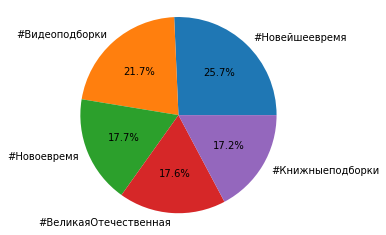

In [31]:
sorted_mentions_in_all_rows = sorted(mentions_in_all_rows.items(), key=lambda x: x[1], reverse=True)

# To display 5 largest values
top_5_keys_mentions_in_all_rows = sorted_mentions_in_all_rows[:5]

# Dividing keys and values for diagram
labels = [item[0] for item in top_5_keys_mentions_in_all_rows]
values = [item[1] for item in top_5_keys_mentions_in_all_rows]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()
